In [4]:
import pandas as pd
df=pd.read_csv("tvmarketing.csv")
num_attributes=df.shape[1]
print("Number of attributes:",num_attributes)

Number of attributes: 2


In [5]:
df.head()
#1]import dataset and display first 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [16]:
import pandas as pd
df = pd.read_csv("tvmarketing.csv")
#3.check the shape of the dataframe (rows,columns)
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)
df.shape[0]
df.shape[1]
print(df)
shape=df.shape
print(shape)

Number of rows: 200
Number of columns: 2
        TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]
(200, 2)


In [12]:
print("DataFrame info")
#2/.check column data types
print(df.info())
df.info()

DataFrame info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [17]:
#4.look at summary statistics
print("summary statistics")
print(df.describe())

summary statistics
               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


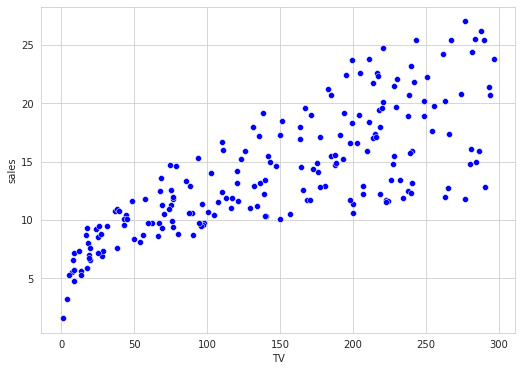

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#5.visualize the relationship between the features and the dependent variable using scatterplots 
df=pd.read_csv("tvmarketing.csv")
sns.set_style("whitegrid")
plt.figure(figsize=(8.5,6))
sns.scatterplot(x=df["TV"],y=df["Sales"],color=["blue"])
plt.xlabel("TV")
plt.ylabel("sales")
plt.show()

In [48]:
x=df["TV"]
y=df["Sales"]
x.head()
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [43]:
#6.prepare x(feature variables ) and y(response variable)
print(df.columns)

y = df['Sales']  
X = df.drop(columns=['Sales'])  
X = X.select_dtypes(include=[np.number])



Index(['TV', 'Sales'], dtype='object')


In [42]:
!pip install scikit-learn



In [41]:
from sklearn.model_selection import train_test_split

#7.Split data into training and testing setss(70% -train 30%-test)-x_train,y_train,x-test,y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140, 1)
X_test shape: (60, 1)
y_train shape: (140,)
y_test shape: (60,)


In [45]:
#8.print the shape of train data and test data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (140, 1)
y_train shape: (140,)
X_test shape: (60, 1)
y_test shape: (60,)


In [47]:
import numpy as np
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
beta = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)
print("Coefficients (including intercept):", beta)


Coefficients (including intercept): [7.23945983 0.0464078 ]


In [50]:
#10. Create the model using the calculated coefficients and make predictions on
#the testing set
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

y_pred = X_test_bias.dot(beta)
print("Predictions on the test set:", y_pred)


Predictions on the test set: [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864 10.72468577
 17.30067133  9.55984994 17.56055502 15.36546598  8.7013056   9.84757831
 18.12208943  7.49006196 13.71334823 15.13806775  7.57823679 16.40964153
 10.73396733 18.25667206 17.89005042 10.38590882  9.00295631 18.88317738
 10.44159818  9.72227724 17.14752559 13.70406667 11.28622018  7.62928537
 16.5117387  10.45087974 16.46997167  8.02375169 20.26612989 18.2937983
  9.48095667 19.94127527 12.67845424  8.51567439 12.62276488 15.45364081
  9.2396361  10.1306659  17.63480751  9.01223787 10.51585066 14.07532908
 12.09371593 10.78037513 10.86854996 15.05453371  7.64320771  7.60144069
 10.78501591 13.24462943 10.64579251 20.68380011  8.14905275 16.40964153]


In [51]:
#11. Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression

# Create and fit the model using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

# Print the intercept and coefficients
print("Intercept from sklearn:", model.intercept_)
print("Coefficients from sklearn:", model.coef_)


Intercept from sklearn: 7.239459830751138
Coefficients from sklearn: [0.0464078]


In [52]:
#12. Print the intercept and coefficients
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept (sklearn):", model.intercept_)
print("Coefficients (sklearn):", model.coef_)


Intercept (sklearn): 7.239459830751138
Coefficients (sklearn): [0.0464078]


In [53]:
#13. Make predictions on the testing set - y_pred
# Add a column of ones to X_test for the intercept term (bias)
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Make predictions on the test data using the manual model: y_pred = X_test * beta
y_pred_manual = X_test_bias.dot(beta)

# Print predictions
print("Predictions on the test set (Manual):", y_pred_manual)


Predictions on the test set (Manual): [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864 10.72468577
 17.30067133  9.55984994 17.56055502 15.36546598  8.7013056   9.84757831
 18.12208943  7.49006196 13.71334823 15.13806775  7.57823679 16.40964153
 10.73396733 18.25667206 17.89005042 10.38590882  9.00295631 18.88317738
 10.44159818  9.72227724 17.14752559 13.70406667 11.28622018  7.62928537
 16.5117387  10.45087974 16.46997167  8.02375169 20.26612989 18.2937983
  9.48095667 19.94127527 12.67845424  8.51567439 12.62276488 15.45364081
  9.2396361  10.1306659  17.63480751  9.01223787 10.51585066 14.07532908
 12.09371593 10.78037513 10.86854996 15.05453371  7.64320771  7.60144069
 10.78501591 13.24462943 10.64579251 20.68380011  8.14905275 16.40964153]


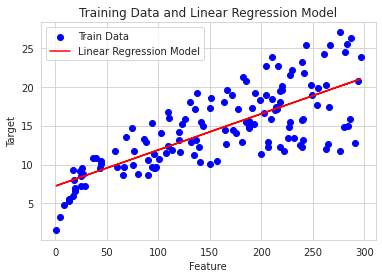

In [54]:
#14 Plot train data and the model
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X_train.iloc[:, 0], y_train, color='blue', label='Train Data')

# Plot the model (line) using the sklearn model
plt.plot(X_train.iloc[:, 0], model.predict(X_train), color='red', label='Linear Regression Model')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training Data and Linear Regression Model')
plt.legend()
plt.show()


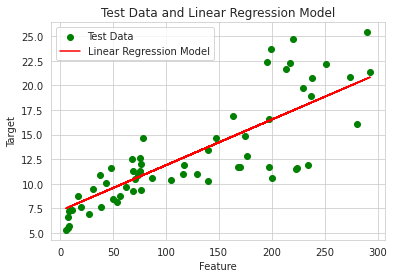

In [57]:
#15. Plot test data and the model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Create the model and fit it using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Make predictions using the trained model
y_pred_sklearn = model.predict(X_test)

# Step 3: Plot the test data and model
plt.scatter(X_test.iloc[:, 0], y_test, color='green', label='Test Data')
plt.plot(X_test.iloc[:, 0], y_pred_sklearn, color='red', label='Linear Regression Model')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Test Data and Linear Regression Model')
plt.legend()
plt.show()


In [58]:
#16. Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_sklearn)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred_sklearn)

# Print the values
print("Mean Squared Error:", mse)
print("R-Squared Value:", r2)


Mean Squared Error: 8.970991242413614
R-Squared Value: 0.6714477229302764


In [59]:
#17. Calculate and print R Squared and Adjusted R Squared values without any
import numpy as np

# Actual values (y_test) and predicted values (y_pred_sklearn) should be defined
# Calculate mean of actual values (y_test)
y_mean = np.mean(y_test)

# Calculate Total Sum of Squares (SST)
sst = np.sum((y_test - y_mean) ** 2)

# Calculate Residual Sum of Squares (SSE)
sse = np.sum((y_test - y_pred_sklearn) ** 2)

# Calculate R-squared (R²)
r2_manual = 1 - (sse / sst)

# Calculate Adjusted R-squared (R² adjusted)
n = len(y_test)  # Number of data points (samples)
p = X_test.shape[1]  # Number of features
r2_adj = 1 - (1 - r2_manual) * (n - 1) / (n - p - 1)

# Print the results
print("Manual R-Squared:", r2_manual)
print("Manual Adjusted R-Squared:", r2_adj)


Manual R-Squared: 0.6714477229302764
Manual Adjusted R-Squared: 0.6657830284980398
